<a href="https://colab.research.google.com/github/shasso2s/-Projekt-zur-Datenanalyse_Microbiome-Analyse-mittels-Python/blob/main/tout_concerne_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
x=torch.empty(4,3, 2,3)


In [9]:
x=torch.rand(2,2)

In [10]:
x=torch.zeros(2,2,dtype=torch.int64)
y=torch.ones(2,2)
print(x)
print(x.dtype)
print(y.size())

tensor([[0, 0],
        [0, 0]])
torch.int64
torch.Size([2, 2])


In [11]:
x=torch.tensor([2.5,0.1])
print(x)

tensor([2.5000, 0.1000])


In [12]:
x=torch.rand(4,4)
print(x)
y=x.view(16)
print(y)
y=x.view(-1,8)
print(y)

print(x[1,:])
print(x[:,1])

print(x[1,1])

tensor([[0.0247, 0.5057, 0.0921, 0.6061],
        [0.9977, 0.9603, 0.1832, 0.7821],
        [0.6881, 0.6605, 0.9225, 0.1980],
        [0.2432, 0.1445, 0.3256, 0.2092]])
tensor([0.0247, 0.5057, 0.0921, 0.6061, 0.9977, 0.9603, 0.1832, 0.7821, 0.6881,
        0.6605, 0.9225, 0.1980, 0.2432, 0.1445, 0.3256, 0.2092])
tensor([[0.0247, 0.5057, 0.0921, 0.6061, 0.9977, 0.9603, 0.1832, 0.7821],
        [0.6881, 0.6605, 0.9225, 0.1980, 0.2432, 0.1445, 0.3256, 0.2092]])
tensor([0.9977, 0.9603, 0.1832, 0.7821])
tensor([0.5057, 0.9603, 0.6605, 0.1445])
tensor(0.9603)


In [13]:
import numpy as np
x=torch.ones(5)
print(x)
b=x.numpy()
print(b)
print(type(b))
x.add_(1)
print(x)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [14]:
if torch.cuda.is_available():
  device=torch.device("cuda")
  print(device)
  x=torch.ones(5,dtype=float64)
  #or
  y=torch.ones(5)
  y=y.to(device)
else:
  device=torch.device("cpu")
  print(device)



cpu


In [15]:
x=torch.randn(3,requires_grad=True)
print(x)
y=x+2
print(y)
y=y*y*2
print(y)
z=y.mean()
z.backward()
print(x.grad)


tensor([0.7805, 0.6305, 1.1875], requires_grad=True)
tensor([2.7805, 2.6305, 3.1875], grad_fn=<AddBackward0>)
tensor([15.4628, 13.8394, 20.3203], grad_fn=<MulBackward0>)
tensor([3.7074, 3.5074, 4.2500])


In [16]:
weights=torch.randn(4, requires_grad=True)
for epoch in range(3):
  model_output=(weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


in the following example we are going to see how Backpropagation works.
we have 3 inputs [x,y,w]  and we want to change the weights for the inputs w


In [17]:
x=torch.tensor(1.0)
y=torch.tensor(2.0)
w=torch.tensor(1.0, requires_grad=True)
# we do forwards pass and calculate the loss
# to have a clearly insight about this exercice plz check compitationla graph in notice Book
y_hat=w*x
loss=(y_hat-y)**2
print(loss)

# let's do the backward pass
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [18]:
x=torch.tensor([1,2,3,4])
y=torch.tensor([2,4,6,8])
w=torch.tensor(0.0, requires_grad=True)

def forward(x):
  return w*x
def loss(y,y_pred):
  return ((y_pred-y)**2).mean()
print(f'predicted value bevor training: f(5)= {forward(5):.3f}')
learning_rate=0.01
n_iter=72
for epoch in range(n_iter):
  y_pred=forward(x)
  l=loss(y,y_pred)

  l.backward()
  # update 
  with torch.no_grad():
    w-=learning_rate*w.grad
  
  w.grad.zero_()

  if epoch%4==0:
    print(f'epoch : {epoch+1},  w={w:.3f}, loss:{l:.8f}')

print(f'predicted value after training: f(5)= {forward(5):.3f}')

predicted value bevor training: f(5)= 0.000
epoch : 1,  w=0.300, loss:30.00000000
epoch : 5,  w=1.113, loss:8.17471695
epoch : 9,  w=1.537, loss:2.22753215
epoch : 13,  w=1.758, loss:0.60698116
epoch : 17,  w=1.874, loss:0.16539653
epoch : 21,  w=1.934, loss:0.04506890
epoch : 25,  w=1.966, loss:0.01228084
epoch : 29,  w=1.982, loss:0.00334642
epoch : 33,  w=1.991, loss:0.00091188
epoch : 37,  w=1.995, loss:0.00024848
epoch : 41,  w=1.997, loss:0.00006770
epoch : 45,  w=1.999, loss:0.00001845
epoch : 49,  w=1.999, loss:0.00000503
epoch : 53,  w=2.000, loss:0.00000137
epoch : 57,  w=2.000, loss:0.00000037
epoch : 61,  w=2.000, loss:0.00000010
epoch : 65,  w=2.000, loss:0.00000003
epoch : 69,  w=2.000, loss:0.00000001
predicted value after training: f(5)= 10.000


in the followin step we are going to make some changement in our previous code
Now we are going to code with **nn.Module**.

let's check the chamgement that gonna do:

1) Design the Model(Input_ output- forward fun)

2) construct loss and optimizer

3) training the model

  forward pass : compute prediction

  Backward pass: gradients

  update weights




In [19]:
import torch.nn as nn
x=torch.tensor([1,2,3,4],dtype=torch.float32)
y=torch.tensor([2,4,6,8],dtype=torch.float32)
w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

def forward(x):
  return w*x
learning_rate=0.01
n_iters=100
loss=nn.MSELoss()
optimizer=torch.optim.SGD([w],lr=learning_rate)
for epoch in range(n_iter):
  y_pred=forward(x)

  l=loss(y, y_pred)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch%2==0:
    print(f'epoch:{epoch+1}, w= {w:.3f},loss= {l:.8f}')
print(f'predicted number f(5) is :{forward(5):.3f}')

  





epoch:1, w= 0.300,loss= 30.00000000
epoch:3, w= 0.772,loss= 15.66018772
epoch:5, w= 1.113,loss= 8.17471695
epoch:7, w= 1.359,loss= 4.26725292
epoch:9, w= 1.537,loss= 2.22753215
epoch:11, w= 1.665,loss= 1.16278565
epoch:13, w= 1.758,loss= 0.60698116
epoch:15, w= 1.825,loss= 0.31684780
epoch:17, w= 1.874,loss= 0.16539653
epoch:19, w= 1.909,loss= 0.08633806
epoch:21, w= 1.934,loss= 0.04506890
epoch:23, w= 1.952,loss= 0.02352631
epoch:25, w= 1.966,loss= 0.01228084
epoch:27, w= 1.975,loss= 0.00641066
epoch:29, w= 1.982,loss= 0.00334642
epoch:31, w= 1.987,loss= 0.00174685
epoch:33, w= 1.991,loss= 0.00091188
epoch:35, w= 1.993,loss= 0.00047601
epoch:37, w= 1.995,loss= 0.00024848
epoch:39, w= 1.996,loss= 0.00012971
epoch:41, w= 1.997,loss= 0.00006770
epoch:43, w= 1.998,loss= 0.00003534
epoch:45, w= 1.999,loss= 0.00001845
epoch:47, w= 1.999,loss= 0.00000963
epoch:49, w= 1.999,loss= 0.00000503
epoch:51, w= 1.999,loss= 0.00000262
epoch:53, w= 2.000,loss= 0.00000137
epoch:55, w= 2.000,loss= 0.0000

now we will update our method , we we don't need forward function any more

In this version we gonna use nn.linear(inp_feature, output_feature)
Applies a linear transformation to the incoming data: **y = x A^T + b **



In [30]:
x=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

n_samples,n_features=x.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features

model=nn.Linear(input_size,output_size)
test_tensor=torch.tensor([5],dtype=torch.float32)
print(f'prediction bevor training  f(5)={model(test_tensor).item():.3f}')

learning_rate=0.01
n_iters=100

loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
for epoch in range(n_iters):
  y_pred=model(x)

  l=loss(y,y_pred)

  l.backward()

  optimizer.step()
  optimizer.zero_grad()

  if epoch%2==0:
    [w,b]=model.parameters()
    print(f'epoch{epoch+1}, w={w[0][0].item():.3f},loss={l:.3f}')
  peint(f'the predicted value is{model()'
  

4 1
prediction bevor training  f(5)=-1.841
epoch1, w=-0.127,loss=39.684
epoch3, w=0.400,loss=19.232
epoch5, w=0.766,loss=9.384
epoch7, w=1.021,loss=4.641
epoch9, w=1.199,loss=2.356
epoch11, w=1.323,loss=1.254
epoch13, w=1.410,loss=0.722
epoch15, w=1.471,loss=0.465
epoch17, w=1.514,loss=0.339
epoch19, w=1.544,loss=0.278
epoch21, w=1.566,loss=0.247
epoch23, w=1.582,loss=0.230
epoch25, w=1.594,loss=0.221
epoch27, w=1.603,loss=0.215
epoch29, w=1.610,loss=0.211
epoch31, w=1.615,loss=0.208
epoch33, w=1.620,loss=0.205
epoch35, w=1.623,loss=0.203
epoch37, w=1.627,loss=0.200
epoch39, w=1.630,loss=0.198
epoch41, w=1.632,loss=0.195
epoch43, w=1.635,loss=0.193
epoch45, w=1.637,loss=0.191
epoch47, w=1.640,loss=0.188
epoch49, w=1.642,loss=0.186
epoch51, w=1.644,loss=0.184
epoch53, w=1.646,loss=0.182
epoch55, w=1.648,loss=0.180
epoch57, w=1.650,loss=0.177
epoch59, w=1.653,loss=0.175
epoch61, w=1.655,loss=0.173
epoch63, w=1.657,loss=0.171
epoch65, w=1.659,loss=0.169
epoch67, w=1.661,loss=0.167
epoch69

In [46]:
x=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

n_samples,n_features=x.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features

model=nn.Linear(input_size,output_size)
test_tensor=torch.tensor([5],dtype=torch.float32)
print(f'prediction bevor training  f(5)={model(test_tensor).item():.3f}')

learning_rate=0.1
n_iters=68

loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
for epoch in range(n_iters):
  y_pred=model(x)

  l=loss(y,y_pred)

  l.backward()

  optimizer.step()
  optimizer.zero_grad()

  if epoch%10==0:
    [w,b]=model.parameters()
    print(f'epoch{epoch+1}, w={w[0][0].item():.3f},loss={l:.3f}')
print(f'the predicted value is{model(test_tensor).item():.3f}')
  

4 1
prediction bevor training  f(5)=-1.443
epoch1, w=2.856,loss=36.143
epoch11, w=1.686,loss=0.187
epoch21, w=1.751,loss=0.095
epoch31, w=1.816,loss=0.052
epoch41, w=1.864,loss=0.028
epoch51, w=1.900,loss=0.015
epoch61, w=1.926,loss=0.008
the predicted value is9.877


In this Section we gonna know how to strkture the model


In [50]:
x=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

n_sample,n_feature=x.shape
input_size=n_features
output_size=n_features

class LinearRegression(nn.Module):
  def __init__(self, input_size,output_size):
    super(LinearRegression,self).__init__()
    self.lin=nn.Linear(input_size,output_size)

  def forward(self,x):
    return self.lin(x)

model=LinearRegression(input_size,output_size)
x_test=y=torch.tensor([5.0], dtype=torch.float32)
learning_rate=0.01
n_iters=20
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
for epoch in range(n_iters):
    y_pred=model(x)

    l=loss(y,y_pred)

    l.backward()

    optimizer.step()

    optimizer.zero_grad()
    if epoch%2==0:
      [w,b]=model.parameters()
      print(f'epoch{epoch+1}, w={w[0][0].item():.3f}, loss={l:.3f}')
print(f'the predicted value is{model(test_tensor).item():.3f}')





epoch1, w=-0.590, loss=57.688
epoch3, w=0.019, loss=29.276
epoch5, w=0.439, loss=15.579
epoch7, w=0.729, loss=8.967
epoch9, w=0.927, loss=5.766
epoch11, w=1.062, loss=4.207
epoch13, w=1.153, loss=3.440
epoch15, w=1.213, loss=3.053
epoch17, w=1.253, loss=2.851
epoch19, w=1.278, loss=2.737
the predicted value is7.445


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Linear regression:
Design the Model(input_size, output_size, forward pass)
construct loss, optimization
training the loop
forward pass
bachward pass
update weights


epoch:10, loss=581.975
epoch:20, loss=341.066
epoch:30, loss=332.863
epoch:40, loss=332.578
epoch:50, loss=332.568
epoch:60, loss=332.568
epoch:70, loss=332.568


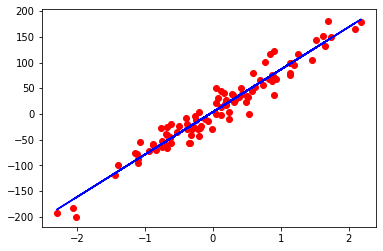

In [61]:
import torch
import torch.nn as nn
import numpy as np

from sklearn import datasets
import matplotlib.pyplot as plt
# prepare the data
x_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

#transform numpy to tensor
x=torch.from_numpy(x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
#reshpae
y=y.view(y.shape[0],1)
n_sample,n_feature=x.shape
input_size=n_feature
output_size=1# depend how many output do we have

# model:
model=nn.Linear(input_size,output_size)
#loss and optimizer
learning_rate=0.1
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
# training loop:
n_iters=100
for epoch in range(n_iter):
  #forward pass
  y_pred=model(x)
  loss=criterion(y_pred,y)
  #backward
  loss.backward()
  #update
  optimizer.step()
  #empty our gradiant
  optimizer.zero_grad()
  if (epoch+1)%10==0:
    print(f'epoch:{epoch+1}, loss={loss.item():.3f}')

#plot
# desactivate gradient attribution:
predicted=model(x).detach().numpy()

plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()

Logistic regression:

In [94]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

bc=datasets.load_breast_cancer()
x,y=bc.data, bc.target

n_sample,n_feature=x.shape
print(n_sample,n_feature)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train=torch.from_numpy(x_train.astype(np.float32))
x_test=torch.from_numpy(x_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))

y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)
#self.linear : f= wx+b
class Model(nn.Module):

  def __init__(self,n_input_features):
    super(Model,self).__init__()
    self.linear=nn.Linear(n_input_features,1)

  def forward(self,x):
    y_pred=torch.sigmoid(self.linear(x))
    return y_pred

model=Model(n_feature)

# loss and optimizer:
learning_rate=0.01
n_iter=100
criterion=nn.BCELoss()# binarycrossentropy
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iter):

  y_pred=model(x_train)

  loss=criterion(y_pred,y_train)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%10==0:
    [w,b]=model.parameters()
    print(f'epoch={epoch+1},loss={loss.item():.3f}')

# evaluation the model:
with torch.no_grad():# fach nhabso training darori nghal9o bhadi
  y_predicted=model(x_test)
  y_predicted_cls=y_predicted.round()
  acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])# number of gut classifed sample/ sample total
  print(f'accuracy:{acc.item():.3f}')








569 30
epoch=10,loss=0.542
epoch=20,loss=0.458
epoch=30,loss=0.402
epoch=40,loss=0.363
epoch=50,loss=0.333
epoch=60,loss=0.310
epoch=70,loss=0.292
epoch=80,loss=0.276
epoch=90,loss=0.264
epoch=100,loss=0.252
accuracy:0.982


epoch=1  forward and backward pass of all training samples

batch_size= number of training samples in one forward & backward pass

number of iteration =number of passes, each pass using [batch_size] 
number of samples

**e.g 100 samples batchsize=20 100/20= 5 iteration for 1 epoch**

In [19]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [34]:
 class WineDataset(Dataset):
 
    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = WineDataset()

# get first sample and unpack
first_data = dataset[0]
feature, label=first_data
print(feature,label)
dataloader=DataLoader(dataset=dataset, batch_size=4,shuffle=True,num_workers=2)

dataiter=iter(dataloader)
data=dataiter.next()
feature,label=data
print(feature,label)

num_epoch=2
total_sample=len(dataset)
n_iteration=math.ceil(total_sample/4)
print(total_sample,n_iteration)
print(f'n_iteration: {n_iteration}')
for epoch in range(num_epoch):
  for i , (input,label) in enumerate(dataloader):
    if(i+1)%5==0:
      print(f'epoch:{epoch+1}/{num_epoch},step{i}/{n_iteration},inputs{input.shape}')





tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
tensor([[1.2770e+01, 2.3900e+00, 2.2800e+00, 1.9500e+01, 8.6000e+01, 1.3900e+00,
         5.1000e-01, 4.8000e-01, 6.4000e-01, 9.9000e+00, 5.7000e-01, 1.6300e+00,
         4.7000e+02],
        [1.4020e+01, 1.6800e+00, 2.2100e+00, 1.6000e+01, 9.6000e+01, 2.6500e+00,
         2.3300e+00, 2.6000e-01, 1.9800e+00, 4.7000e+00, 1.0400e+00, 3.5900e+00,
         1.0350e+03],
        [1.1810e+01, 2.1200e+00, 2.7400e+00, 2.1500e+01, 1.3400e+02, 1.6000e+00,
         9.9000e-01, 1.4000e-01, 1.5600e+00, 2.5000e+00, 9.5000e-01, 2.2600e+00,
         6.2500e+02],
        [1.3520e+01, 3.1700e+00, 2.7200e+00, 2.3500e+01, 9.7000e+01, 1.5500e+00,
         5.2000e-01, 5.0000e-01, 5.5000e-01, 4.3500e+00, 8.9000e-01, 2.0600e+00,
         5.2000e+02]]) tensor([[3.],
        [1.],
        [2.],
        [3.]])
178 45
n_ite

In [17]:
import torch
import torchvision
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', transform=torchvision.transforms.ToTensor())



In [53]:
class MnistDataset(Dataset):

  def __init__(self,transform=None):
    xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
    self.n_sample=xy.shape[0]
    self.x=xy[:,1:]
    self.y=xy[:,[0]]
    self.transform=transform

  def __getitem__(self, index):
   sample= self.x[index], self.y[index]
   if self.transform:
     sample=self.transform(sample)
   return sample

  def __len__(self):
    return n_samples


class ToTensor:

  def __call__(self,sample):
    inputs, target=sample
    return torch.from_numpy(inputs),torch.from_numpy(target)

class Multransform:

  def __init__(self, factor):
    self.factor=factor

  def __call__(self, sample):
    inputs, target=sample
    inputs=inputs*self.factor
    return inputs, target


dataset= MnistDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
#print(features, labels)


# without class transform
dataset=WineDataset()
first_data=dataset[0]
feature, target=first_data
print(type(feature),type(target))
print(feature,target)
  
composed = torchvision.transforms.Compose([ToTensor(), Multransform(4)])
dataset= MnistDataset(transform=composed)
first_data=dataset[0]
feature, label=first_data
print(type(feature),type(label))
print(feature,label)


<class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])


**Softmax and Cross-Entropy**

In [ ]:
for more information about how to calcule cross entropy loss see the notice book

In [57]:
import torch.nn as nn

loss=nn.CrossEntropyLoss()

# preditected value
y=torch.tensor([0])
#  shape of y_hat is calculated through n_sample* n_classe let say 1*3
y_pred_good=torch.tensor([[2.0,1.0,0.1]])
y_pred_bad=torch.tensor([[0.5,2.0,0.3]])

l1=loss(y_pred_good,y)
l2=loss(y_pred_bad,y)

print(l1.item())
print(l2.item())

predictions1=torch.max(y_pred_bad,1)
predictions2=torch.max(y_pred_good,1)

print(predictions1)
print(predictions2)


0.4170299470424652
1.840616226196289
torch.return_types.max(
values=tensor([2.]),
indices=tensor([1]))
torch.return_types.max(
values=tensor([2.]),
indices=tensor([0]))


In [59]:
loss=nn.CrossEntropyLoss()

# preditected value pytorch support also multiple sample
y=torch.tensor([2,0,1])
#  shape of y_hat is calculated through n_sample* n_classe let say 3*3
y_pred_good=torch.tensor([[0.1,1.0,2.1],[2.0,1.0,0.1],[0.1,3.0,0.1]])
y_pred_bad=torch.tensor([[2.1,1.0,0.1],[2.0,1.0,2.1],[0.1,3.0,0.1]])

l1=loss(y_pred_good,y)
l2=loss(y_pred_bad,y)

print(l1.item())
print(l2.item())

predictions1=torch.max(y_pred_bad,1)
predictions2=torch.max(y_pred_good,1)

print(predictions1)
print(predictions2)

0.3018244206905365
1.1312984228134155
torch.return_types.max(
values=tensor([2.1000, 2.1000, 3.0000]),
indices=tensor([0, 2, 1]))
torch.return_types.max(
values=tensor([2.1000, 2.0000, 3.0000]),
indices=tensor([2, 0, 1]))


Neural Net classification 
in the Following example we will discuss the Multiclassification probelm using softmax layer

In [63]:
class NeuralNet2(nn.Module):

  def __init__(self,input_size, hidden_size,num_class):
    super(NeuralNet2,self).__init__()
    self.linear=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.linear=nn.Linear(hidden_size,num_class)

  def forward(self,x):
    out=self.linear(x)
    out=nn.relu(out)
    out=nn.linear(out)
    # no softmax at the end
    return out
model=NeuralNet2(input_size=28*28,hidden_size=5,num_class=3)
loss=nn.CrossEntropyLoss()

In [71]:
class NeuralNet1(nn.Module):

  def __init__(self,input_size,hidden_size):
    super(NeuralNet1,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.linear2=nn.Linear(hidden_size,1)

  def forward(self,x):
    out=self.linear1(x)
    out=nn.relu(out)
    out=sel.linear2(out)
    y_pred=torch.sigmoid(out)
    return y_pred

model1=NeuralNet1(input_size=28*28,hidden_size=5)
loss=nn.BCELoss()

Activation fuction:
sigmoid : 1/1+np.exp(-x) for binary classification pronlem

TanH: (2/1+np.exp(-2x))-1[ -1,+1] good choce in hidden layer

relu: f(x)=max(0,x) if you don't know which fun , you can use in hiddenlayer just use hiddenlayer

leaky relu fun: modified and optimization of relu f(x)=x if x>=0 or a*x otherweise(a is very small number)
solve the problem of vanisching problem
if we use the relu function , that means the negative number goes to 0 , this produce that the gradient will aso goes to 0 , when the gradient is 0 that means this weight will never be updated
that is when somtime we use leaky relu instead of relu fn


**how we use activation function in our model:**
in the following exmaple we will use sigmoid as activierungsfunction für die Hidden layer in 2 version





In [76]:
#version 1:
class NeuralNetAkti(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNetAkti,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLu()
    self.linear2=nn.Linear(hidden_size,1)
    self.sigmoid=nn.sigmoid()

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    out=self.sigmoid(out)
    return out

In [77]:
#version 2:
class NeuralNetAkti2(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNetAkti,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.linear2=nn.Linear(hidden_size,1)
  

  def forward(self,x):
   out=torch.relu(self.linear1(x))
   out=torch.sigmoid(sel.linear2(out))
   return out

sometimes some fuction are not available in torch therfore we should call functional function
import torch.nn.functional as F 
and here for example leaky relu is available

In this Sectio we gonna use all the knowledge and skills that we learn in the previous sections
# Mnist

1) DataLoader, transformation

2) multi layer , act fun

3) loss , optimi

4)Model evaluation

5) GPU support


**Notizen about the code**
train_loader is divided into batch every batch hast 100 stuck

In [69]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
writer=SummaryWriter("runs/mnist")
import sys

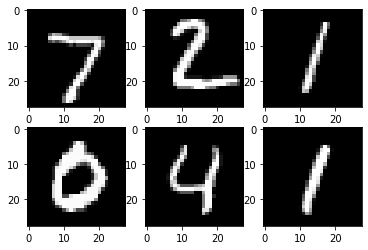

Epoch [1/2], Step [100/600], Loss: 0.4313
Epoch [1/2], Step [200/600], Loss: 0.3320
Epoch [1/2], Step [300/600], Loss: 0.1936
Epoch [1/2], Step [400/600], Loss: 0.2376
Epoch [1/2], Step [500/600], Loss: 0.1113
Epoch [1/2], Step [600/600], Loss: 0.1579
Epoch [2/2], Step [100/600], Loss: 0.1455
Epoch [2/2], Step [200/600], Loss: 0.1027
Epoch [2/2], Step [300/600], Loss: 0.0631
Epoch [2/2], Step [400/600], Loss: 0.1244
Epoch [2/2], Step [500/600], Loss: 0.0972
Epoch [2/2], Step [600/600], Loss: 0.1522
Accuracy of the network on the 10000 test images: 96.95 %


In [71]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()
###########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()
###################################

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

**CNN : image classification based on cifar-10**






In [6]:
import torch
import torchvision
from torchvision import transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.nn as nn

Files already downloaded and verified
Files already downloaded and verified


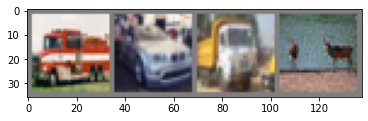

In [50]:
num_epochs = 5
batch_size = 4
learning_rate = 0.001

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform =transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_dataset=torchvision.datasets.CIFAR10(root='./data',transform=transform,train=True, download=True)

test_dataset=torchvision.datasets.CIFAR10(root='./data',transform=transform,train=False,download=True)

train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

 #show images
imshow(torchvision.utils.make_grid(images))


In [52]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')









Epoch [1/5], Step [2000/12500], Loss: 2.2956
Epoch [1/5], Step [4000/12500], Loss: 2.2795
Epoch [1/5], Step [6000/12500], Loss: 2.2828
Epoch [1/5], Step [8000/12500], Loss: 2.3532
Epoch [1/5], Step [10000/12500], Loss: 2.3047
Epoch [1/5], Step [12000/12500], Loss: 2.0248
Epoch [2/5], Step [2000/12500], Loss: 2.3169
Epoch [2/5], Step [4000/12500], Loss: 3.5145
Epoch [2/5], Step [6000/12500], Loss: 1.7573
Epoch [2/5], Step [8000/12500], Loss: 2.5421
Epoch [2/5], Step [10000/12500], Loss: 2.0421
Epoch [2/5], Step [12000/12500], Loss: 2.0206
Epoch [3/5], Step [2000/12500], Loss: 1.8209
Epoch [3/5], Step [4000/12500], Loss: 1.5343
Epoch [3/5], Step [6000/12500], Loss: 1.5667
Epoch [3/5], Step [8000/12500], Loss: 1.6868
Epoch [3/5], Step [10000/12500], Loss: 1.5645
Epoch [3/5], Step [12000/12500], Loss: 1.3543
Epoch [4/5], Step [2000/12500], Loss: 1.0179
Epoch [4/5], Step [4000/12500], Loss: 1.5338
Epoch [4/5], Step [6000/12500], Loss: 1.2002
Epoch [4/5], Step [8000/12500], Loss: 1.2821
Epoc

In [55]:
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(4):
            label = labels[i] 
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Finished Training
Accuracy of the network: 48.79 %
Accuracy of plane: 59.6 %
Accuracy of car: 56.7 %
Accuracy of bird: 24.3 %
Accuracy of cat: 27.1 %
Accuracy of deer: 36.9 %
Accuracy of dog: 45.2 %
Accuracy of frog: 56.5 %
Accuracy of horse: 65.5 %
Accuracy of ship: 63.2 %
Accuracy of truck: 52.9 %


In [ ]:
import torch
import torch.nn as nn

''' 3 DIFFERENT METHODS TO REMEMBER:
 - torch.save(arg, PATH) # can be model, tensor, or dictionary
 - torch.load(PATH)
 - torch.load_state_dict(arg)
'''

''' 2 DIFFERENT WAYS OF SAVING
# 1) lazy way: save whole model
torch.save(model, PATH)
# model class must be defined somewhere
model = torch.load(PATH)
model.eval()
# 2) recommended way: save only the state_dict
torch.save(model.state_dict(), PATH)
# model must be created again with parameters
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''


class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)
# train your model...

####################save all ######################################
for param in model.parameters():
    print(param)

# save and load entire model

FILE = "model.pth"
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)


############save only state dict #########################

# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict())
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()

print(loaded_model.state_dict())


###########load checkpoint#####################
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval()
# - or -
# model.train()

print(optimizer.state_dict())

# Remember that you must call model.eval() to set dropout and batch normalization layers 
# to evaluation mode before running inference. Failing to do this will yield 
# inconsistent inference results. If you wish to resuming training, 
# call model.train() to ensure these layers are in training mode.

""" SAVING ON GPU/CPU 
# 1) Save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)
device = torch.device('cpu')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device))
# 2) Save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)
# Note: Be sure to use the .to(torch.device('cuda')) function 
# on all model inputs, too!
# 3) Save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)
device = torch.device("cuda")
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want
model.to(device)
# This loads the model to a given GPU device. 
# Next, be sure to call model.to(torch.device('cuda')) to convert the model’s parameter tensors to CUDA tensors
"""